# **About Dataset**

Context

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

Attribute Information:

age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats
import numpy as np

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [5]:
data = pd.read_csv("heart.csv", sep=",")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [14]:
data.shape

(1025, 14)

In [16]:
# Print the last 5 example
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [20]:
# Checking for missing  value
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
# statistical measures about the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [28]:

# Assume df is your DataFrame with multiple attributes

# Calculate correlation matrix
correlation_matrix = data.corr()

# Create an interactions table
interactions_table = pd.DataFrame(index=data.columns, columns=data.columns)

# Populate the interactions table with correlation coefficients
for column1 in data.columns:
    for column2 in data.columns:
        interactions_table.loc[column1, column2] = correlation_matrix.loc[column1, column2]

# Display the interactions table
interactions_table

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.0,-0.10324,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.10324,1.0,-0.041119,-0.078974,-0.198258,0.0272,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.0,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.0,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.0,0.026917,-0.14741,-0.021772,0.067382,0.06488,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.0272,0.079294,0.181767,0.026917,1.0,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.14741,-0.104051,1.0,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.0,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.0,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.06488,0.010859,-0.050114,-0.349796,0.310844,1.0,-0.575189,0.221816,0.202672,-0.438441


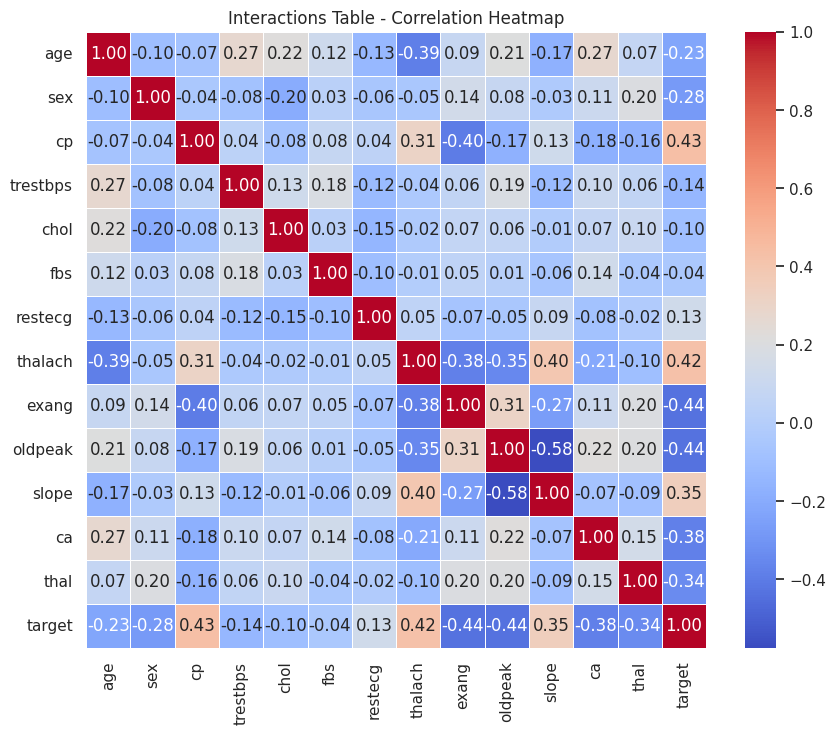

In [29]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Interactions Table - Correlation Heatmap')
plt.show()

Target :

1 ---> Defective Heart

0 ---> Healthy Heart

From this correlation matrix, we can understand that all data is unique and not strongly correlated with each other.

It’s also worth noting that some attributes are highly correlated with the target - cp(chest pain), thalch(maximum heart rate achieved), slope(the slope of the peak exercise ST segment).

-- Secondly, let's look on target balanced plot. An extremely imbalanced dataset can render the whole model training useless and thus, will be of no use

In [30]:
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

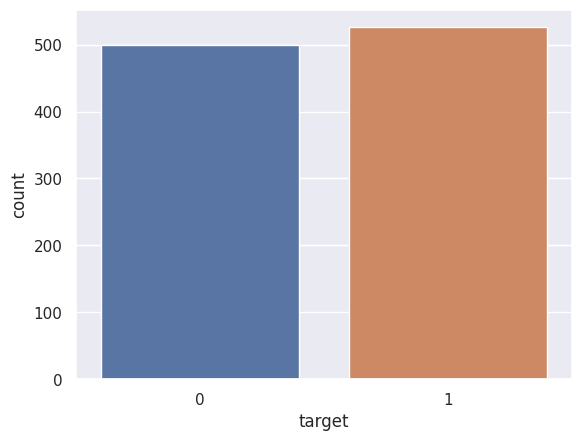

In [31]:
sns.countplot(x="target", data=data)
plt.show()

# **Statistical Plot And Inferences:**


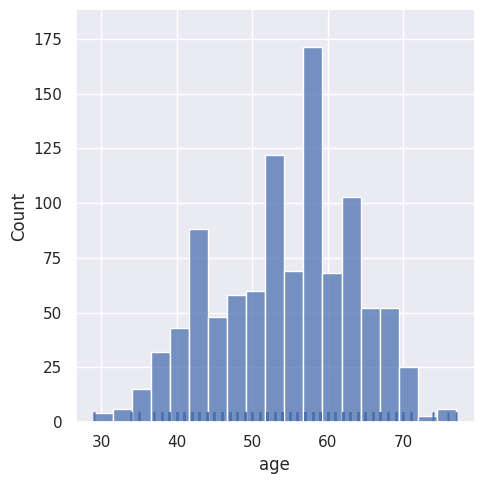

In [33]:
sns.displot(data['age'],rug=True)
plt.show()

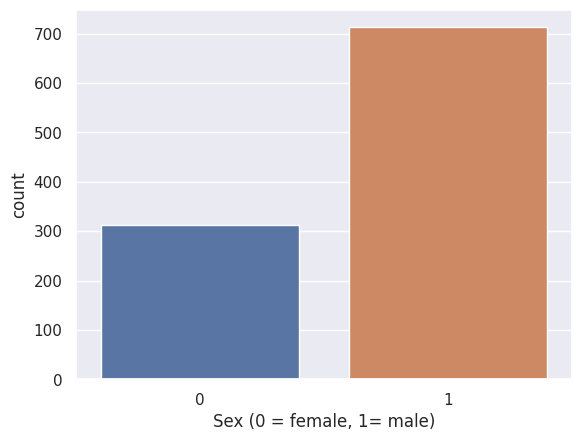

In [34]:
sns.countplot(x='sex', data=data)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

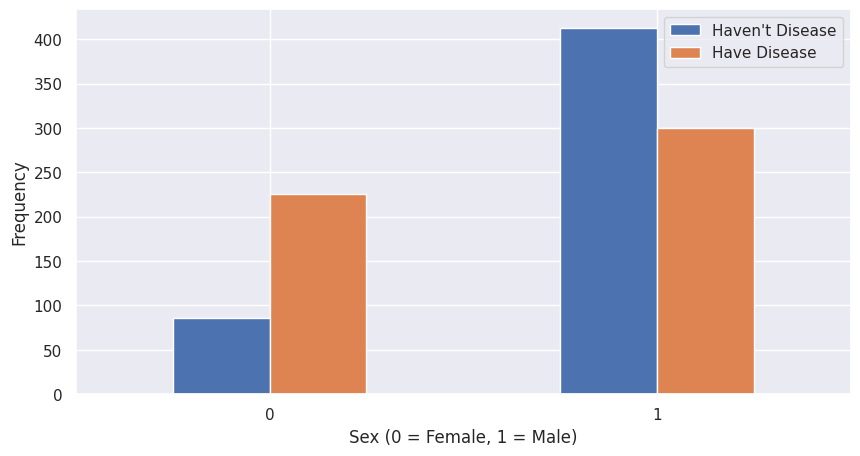

In [35]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(10,5))
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

This data shows that mean age of 54.434146 ,

# **Outliers**

In statistics, an outlier is an observation point that is distant from other observations. The outliers can be a result of a mistake during data collection or it can be just an indication of variance in your data.

For detecting outliers in such case we use z-score method. The z-score (or standard score) is a measure of how far away a particular data point is from the mean of a group of data. It is expressed in terms of standard deviations from the mean. The formula for calculating the z-score for a data point x in a dataset with mean μ and standard deviation σ is:
z= (x-μ)/​σ





In [37]:
z = np.abs(stats.zscore(data))
z

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.268437,0.661504,0.915755,0.377636,0.659332,0.418878,0.891255,0.821321,0.712287,0.060888,0.995433,1.209221,1.089852,1.026698
1,0.158157,0.661504,0.915755,0.479107,0.833861,2.387330,1.004049,0.255968,1.403928,1.727137,2.243675,0.731971,1.089852,1.026698
2,1.716595,0.661504,0.915755,0.764688,1.396233,0.418878,0.891255,1.048692,1.403928,1.301417,2.243675,0.731971,1.089852,1.026698
3,0.724079,0.661504,0.915755,0.936037,0.833861,0.418878,0.891255,0.516900,0.712287,0.912329,0.995433,0.238625,1.089852,1.026698
4,0.834359,1.511706,0.915755,0.364875,0.930822,2.387330,0.891255,1.874977,0.712287,0.705408,0.624121,2.179817,0.522122,1.026698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.661504,0.055931,0.479107,0.484803,0.418878,0.891255,0.647366,1.403928,0.912329,0.995433,0.731971,0.522122,0.973997
1021,0.613800,0.661504,0.915755,0.377636,0.232705,0.418878,1.004049,0.352873,1.403928,1.471705,0.624121,0.238625,1.089852,1.026698
1022,0.819834,0.661504,0.915755,1.234378,0.562371,0.418878,1.004049,1.353113,1.403928,0.060888,0.624121,0.238625,0.522122,1.026698
1023,0.488996,1.511706,0.915755,1.234378,0.155137,0.418878,1.004049,0.429923,0.712287,0.912329,0.995433,0.731971,0.522122,0.973997


In [38]:
threshold = 3
res = np.where(z > 3)
print("Length:", len(res[0]), ":", len(res[1]))
print("Rows:",res[0])
print("Columns:",res[1])

Length: 56 : 56
Rows: [ 14  52  54  55  69  83 123 128 151 158 175 179 192 208 242 246 267 290
 294 296 319 326 329 340 348 359 378 393 417 428 450 464 465 481 508 521
 526 559 597 613 641 665 685 686 688 734 743 749 831 833 889 893 958 970
 993 996]
Columns: [12 11  9  9  9 11  4 11  3  4  3  4  4 11 11  3  7 11  3  7 12  3 12 11
 11 12  7  9 11 11  4  4 11  4  3 11  9  7 11  9  4  4  4 12  3 12 11 11
 11  9  4 12  4 11 11  4]


In [40]:
outliers_row = []
for j in res[0]:
    r = []
    for i in data.columns:
        r.append(data[i][j])
    outliers_row.append(r)

In [41]:
outliers_data = pd.DataFrame(data=outliers_row, columns = data.columns)
outliers_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
1,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
2,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
3,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
4,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
5,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
6,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
7,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
8,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
9,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [42]:
outliers_data.to_csv("outliers.csv", )

# Splitting the Features and Target

Prepare data to train

In [43]:
X = data.drop(columns = "target", axis=1)
Y= data["target"]

In [44]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [45]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

The train_test_split function is a utility in machine learning, commonly used for splitting a dataset into training and testing sets. It's often employed to assess the performance of a machine learning model on unseen data. The function is part of the scikit-learn library, a popular machine learning library in Python.

Here's a breakdown of the parameters you provided:

X: This is typically the feature matrix (input data) of your dataset. It contains the independent variables.

Y: This is usually the target variable (output) corresponding to the feature matrix X. It contains the labels or values you are trying to predict.

test_size: This parameter determines the proportion of the dataset that should be used for testing. In the provided example, 20% of the data will be used for testing, and the remaining 80% will be used for training.

stratify: This is an optional parameter. When you set stratify=Y, it ensures that the splitting process maintains the same proportion of target classes as the original dataset. This is particularly useful when dealing with imbalanced datasets to ensure that both the training and testing sets have a similar class distribution.

random_state: This parameter allows you to set a seed for the random number generator. Setting a seed ensures reproducibility. In the provided example, the random state is set to 2.

In [47]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0
586,64,1,2,125,309,0,1,131,1,1.8,1,0,3
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2
462,52,1,3,118,186,0,0,190,0,0.0,1,0,1
186,40,1,0,110,167,0,0,114,1,2.0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,63,1,0,130,254,0,0,147,0,1.4,1,1,3
906,42,1,0,140,226,0,1,178,0,0.0,2,0,2
1002,66,1,0,112,212,0,0,132,1,0.1,2,1,2
966,58,1,0,128,259,0,0,130,1,3.0,1,2,3


In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
X_train

array([[-0.26274833,  0.65275337, -0.91698623, ..., -0.62653046,
        -0.73158075, -3.81877147],
       [ 1.06721234,  0.65275337,  1.01599246, ..., -0.62653046,
        -0.73158075,  1.10222267],
       [-0.37357838, -1.53197218,  1.01599246, ...,  0.99927642,
         0.2391251 , -0.53810871],
       ...,
       [ 1.28887246,  0.65275337, -0.91698623, ...,  0.99927642,
         0.2391251 , -0.53810871],
       [ 0.40223201,  0.65275337, -0.91698623, ..., -0.62653046,
         1.20983096,  1.10222267],
       [ 0.1805719 ,  0.65275337,  0.04950311, ...,  0.99927642,
        -0.73158075,  1.10222267]])

In [50]:
X.shape, X_train.shape, X_test.shape

((1025, 13), (820, 13), (205, 13))

In [51]:
Y.shape, y_train.shape, y_test.shape

((1025,), (820,), (205,))

# **Model Training**

Logistic Regression

In [52]:
m1="Logistic Regression"
lr_model = LogisticRegression(solver="liblinear",random_state=2 )
# training the model with training data
lr_model.fit(X_train, y_train)
# Accuracy on training data
X_train_prediction = lr_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_prediction = lr_model.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_lr*100)

#Confussion matrix
LR_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confussion matrix")
print(LR_conf_matrix)

Accuracy on Training data:  85.85365853658537
Accuracy on Test data:  80.48780487804879
Confussion matrix
[[73 27]
 [13 92]]


 **Decision Tree Classifier**

In [63]:

# Define the Decision Tree model with specified parameters
m6 = "Decision Tree"
dt_model = DecisionTreeClassifier(random_state=2)

# Train the model with the training data
dt_model.fit(X_train, y_train)

# Evaluate the accuracy on the training data
X_train_prediction_dt = dt_model.predict(X_train)
training_data_accuracy_dt = accuracy_score(X_train_prediction_dt, y_train)
print(f"Accuracy on Training data: ", training_data_accuracy_dt * 100)

# Evaluate the accuracy on the test data
X_test_prediction_dt = dt_model.predict(X_test)
test_data_accuracy_dt = accuracy_score(X_test_prediction_dt, y_test)
print(f"Accuracy on Test data: ", test_data_accuracy_dt * 100)

# Print the confusion matrix for the test data
DT_conf_matrix = confusion_matrix(y_test, X_test_prediction_dt)
print("Confusion matrix:")
print(DT_conf_matrix)

Accuracy on Training data:  100.0
Accuracy on Test data:  100.0
Confusion matrix:
[[100   0]
 [  0 105]]


**Naive Bayes**

In [55]:
m2="Naive Bayes"

nb = GaussianNB()
# training the model with training data
nb.fit(X_train,y_train)
# Accuracy on training data
X_train_prediction = nb.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_prediction = nb.predict(X_test)
test_data_accuracy_nb = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_nb*100)

#Confussion matrix
nb_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confussion matrix")
print(nb_conf_matrix)

Accuracy on Training data:  83.90243902439025
Accuracy on Test data:  78.04878048780488
Confussion matrix
[[75 25]
 [20 85]]


**Random Forest**

In [58]:
m3="Random Forest"
rf = RandomForestClassifier(n_estimators=100, criterion="entropy",max_depth=7, min_samples_leaf=2, max_features="sqrt",random_state=2)
# training the model with training data
rf.fit(X_train,y_train)
# Accuracy on training data
X_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)

# Accuracy on test data
X_test_prediction = rf.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_rf*100)

#Confussion matrix
rf_conf_matrix = confusion_matrix(y_test, X_test_prediction)
print("Confussion matrix")
print(rf_conf_matrix)


Accuracy on Training data:  99.51219512195122
Accuracy on Test data:  100.0
Confussion matrix
[[100   0]
 [  0 105]]


**K-Neighbour**

In [59]:
m5="K-Neighbour"
knn = KNeighborsClassifier(n_neighbors=20, algorithm="auto" )
# train on the training set
knn.fit(X_train, y_train)
# Accuracy on training data
X_train_predict= knn.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict, y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_predict= knn.predict(X_test)
test_data_accuracy_knn=accuracy_score(X_test_predict, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_knn*100)
#Confussion matrix
knn_confusion_matrix=  confusion_matrix(y_test,X_test_predict)
print("Confusion Matrix")
print(knn_confusion_matrix)

Accuracy on Training data:  85.73170731707317
Accuracy on Test data:  81.46341463414633
Confusion Matrix
[[82 18]
 [20 85]]


# **Results**

In [64]:
results = {"Models": [m1, m2, m3,m5,m6],
           "Accuracy": [test_data_accuracy_lr, test_data_accuracy_nb, test_data_accuracy_rf, test_data_accuracy_knn,test_data_accuracy_dt]}

for (key, value) in results.items():
    if key=="Accuracy":
        results[key]=  [item*100 for item in results[key]]


result_df=pd.DataFrame(results)

In [65]:
result_df

,Models,Accuracy
0,Logistic Regression,80.487805
1,Naive Bayes,78.048780
2,Random Forest,100.000000
3,K-Neighbour,81.463415
4,Decision Tree,100.000000


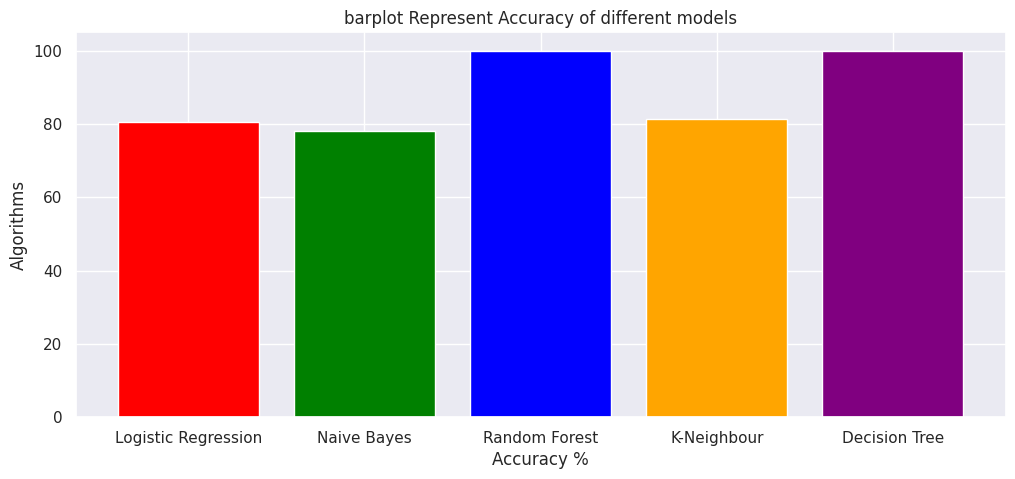

In [66]:
colors = ['red','green','blue','orange','purple']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(result_df['Models'],result_df['Accuracy'],color = colors)
plt.show()